In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn import svm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8) # set default figure size, 8in by 6in

# Assignment 04: Support Vector Machines

**Due Date:** Friday 10/26/2018 (by midnight)

Name: Shruthi Madishetty

CWID: 5023 9178


## Introduction 
In this exercise you will be using support vector machines (SVMs) with various example 2D datasets.  Exerimenting with
these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

## Example Dataset 1

We will begin with a 2D example dataset which can be separated by a linear boundary.  In the following cell, we load the dataset
for you.  Plot the dataset using '+' symbols for the positive examples (the 1's) and 'o' symbols for the negative examples
(the 0's).

In [13]:
data = pd.read_csv('data/assg-04-data1.csv', names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
y = data.y.values
m,n = X.shape # m = number of training examples, n = number of features


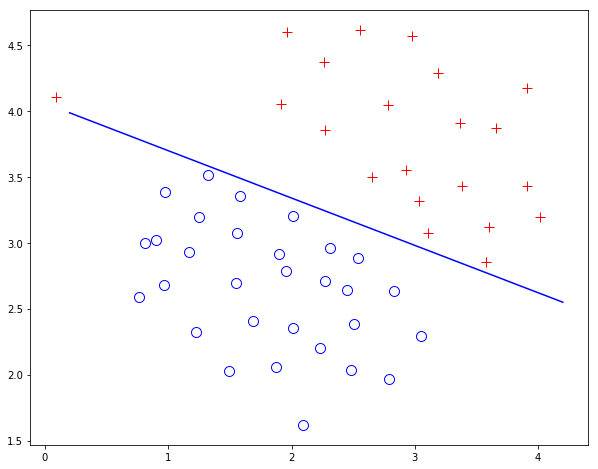

In [14]:
# plot the data to visualize it here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e6, solver='lbfgs')
logreg.fit(X, y)
dec_xpts = np.arange(0.2, 4.5)
theta = logreg.coef_[0]
dec_ypts = - (logreg.intercept_ + theta[0] * dec_xpts) / theta[1]

pos = np.where(y==1)
neg = np.where(y==0)

plt.plot(X[neg,0], X[neg,1], 'bo', markersize=10, fillstyle='none', markeredgewidth=1) 
plt.plot(X[pos,0], X[pos,1], 'r+', markersize=10, markeredgewidth=1) 
plt.plot(dec_xpts, dec_ypts, 'b-');

You may have noticed that there is a point that appears like it may be a mistake or an outlier in the data.  Notice the positive
example on the far left at about (0.1, 4.1).  As a part of this exercise, you will see how this outlier affects the SVM decision
boundary.

You will try using different values of the $C$ parameter with a linear SVM classifier.  We discussed that the $C$ parameter in the
usual formulation of the SVM model corresponds to the $lambda$ parameter we used to specify the level of regularization we wanted
to be used in the model that was found.  Recall back from week 5 that regularization is a penalty term we add when parameters of a model get too big.  The idea is that such penalities penalize overfitting of the model.  The $C$ parameter in SVM can be thought
of in the same way, though since it is a paramter on the cost function, smaller values of C represent penalizing the model for
too much overfitting.

Another way to think of $C$ in the context of SVM models is that the $C$ parameter is a positive value that controls the penalty
for misclassified training examples.  A small $C$ parameter tells SVM to not worry so much about some misclassification errors, as
long as the decision boundary is being maximized.  A large $C$ parameter, on the other hand$ tells the SVM optimization to try
hard to correctly classify all the examples correctly.  As we have talked about before, at some point this can lead to overfitting,
and though the model parameters of an overfitted model will classify well (or perfectly) our training set data, they will probably
not perform well on unseen data if the model is overfitted.

In the next cell, create a linear SVM classification model (using the svm class from `scikit-learn`).  Use $C = 1$ for the
$C$ parameter, and plot the resulting decision boundary of the classifier on a plot with the original positive and negative
examples plotted as '+' and 'o' symbols as you did in the first figure.

0.9803921568627451


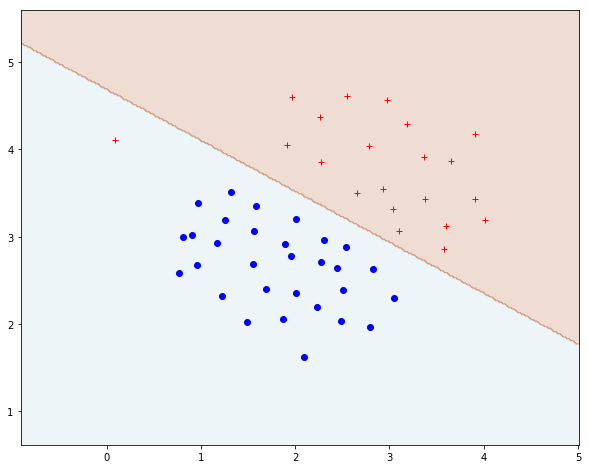

In [15]:
# create a linear SVM classifier using scikit-learn
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

C = 1.0
svmclf1 = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=C, loss='hinge')),
))

svmclf1.fit(X, y)
print(svmclf1.score(X,y))
# display the decision boundary for the coeficients
# visualize the data points of the two categories
# add the decision boundary line
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svmclf1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)


# plot the original data
# plot the original data
neg_indexes = np.where(y==0)[0]
pos_indexes = np.where(y==1)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'bo')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r+')



If you performed the previous task correctly, you should see that your SVM classifier with the $C$ parameter set to 1 chooses a decision boundary that basically ignores the outlier point, and the decision boundary appears to be directly in the center of the
natural separation indicated by the gap between the positive and negative examples.

In the next cell, repeat your previous work, but use a value of $C = 100$ for the $C$ parameter.

1.0


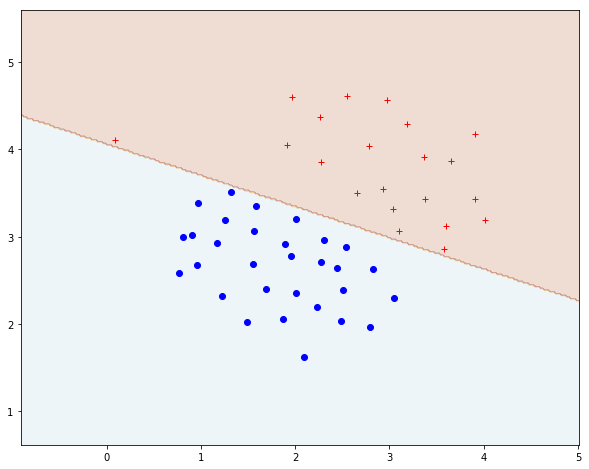

In [16]:
# create a linear SVM classifier using scikit-learn

# display the decision boundary for the coeficients

# visualize the data points of the two categories

# add the decision boundary line
C = 100.0
svmclf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=C, loss='hinge', max_iter=3000)),
))

svmclf.fit(X, y)
print(svmclf.score(X,y))
# display the decision boundary for the coeficients
# visualize the data points of the two categories
# add the decision boundary line
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svmclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)


# plot the original data
# plot the original data
neg_indexes = np.where(y==0)[0]
pos_indexes = np.where(y==1)[0]
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'bo')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r+')

Notice the effect that the large value of $C$ has on the decision boundary the model produces.  For learning models that use a
$C$ parameter, which affects how much weight is given to the cost of the differences between the model and the correct result, high
$C$ values will result in models that attempt to classify as much of the training data correctly as possible.  But, as we have
discussed, these may lead to overfitted models, that have problems generalizing.

## SVM with Gaussian Kernels

The SVM classifier from the `scikit-learn` library implements all of the typical and standard kernel functions that are used for
this classifier.  However, the SVM classifier in `scikit-learn` will also let you specify your own kernel function, if you need
some sort of special kernel measure of similarity.  In this part of our assignment, we are not going to make up a new kernel function, but you will implement the gaussian kernel function.  We will then use your implementation of the gaussian kernel
to create an SVM classifier for a data set that is not linearly separable, and we will compare and show that your implementation
of the gaussian kernel is correct by comparing the results to what are obtained by using `scikit-learn`s implementation of
a gaussian kernel.

To find non-linear decision boundaries with SVM, we need to first implement a Gaussian kernel. 
You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
$(x^{(i)} , x^{(j)} )$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which 
determines how fast the similarity metric decreases (to 0) as the examples are further apart.

The gaussian kernel is defined as:

$$
K_{\textrm{gaussian}}(x^{(i)}, x^{(j)}) = \textrm{exp}(- \frac{\| x^{(i)} - x^{(j)} \|^2}{2 \sigma^2})
= \textrm{exp}(- \frac{\sum_{k=1}^{n} (x_k^{(i)} - x_k^{(j)})^2 }{2 \sigma^2})
$$

Here recall that $x^{(i)}$ and $x^{(j)}$ represent two separate points, where usually one is an input and the other is a landmark
location.  Both of these are $n$ dimensional vectors, where we have a measurement for each of the $n$ features of the data we
are trying to model.  The top part of the fraction calculates norm, which is related to the distance, between the
two points in $n$ dimensional space
then squares this value.  As you can see on the right side part of the equation, we can calculate this norm by 
simply summing up the square of the differences of each of the dimensions.  Also remember that $\sigma$ is simply a parameter
that controls how fast the function falls to 0 as the distance between the two given locations is increased.

In the next cell, create a function called gaussian_kernel that takes 2 n-dimensional (numpy) vectors as input.  It should
calculate the gaussian similarity between these two points and return the similarity measure as a scalar floating point
value.  Here is an example of using the function if you have it implemented correctly:

```python

sigma = 2.0
xi = np.array([1, 0, -1, -3])
xj = np.array([1, 0, -1, -3])
print gaussian_kernel(xi, xj, sigma)
>>> 1.0

xi = np.array([1, 1, -1, -3])
xj = np.array([2, 0, -1, -5])
print gaussian_kernel(xi, xj, sigma)
>>> 0.472366552741

xi = np.array([1, 6,  2, -2])
xj = np.array([5, 0, -1, -5])
print gaussian_kernel(xi, xj, sigma)
>>> 0.000158461325116

```

In [17]:
# write your implementation of gaussian_kernel here
C = 0.001
def gaussian_kernel(x, y, g):
    from numpy.linalg import norm
    return np.exp(- norm(x - y)**2.0 / (2 * g**2.0))


sigma = 2.0
xi = np.array([1, 0, -1, -3])
xj = np.array([1, 0, -1, -3])
print(gaussian_kernel(xi, xj, sigma))

xi = np.array([1, 1, -1, -3])
xj = np.array([2, 0, -1, -5])
print(gaussian_kernel(xi, xj, sigma))

xi = np.array([1, 6,  2, -2])
xj = np.array([5, 0, -1, -5])
print(gaussian_kernel(xi, xj, sigma))

1.0
0.47236655274101474
0.00015846132511575126


## Example Dataset 2

In the next cell we will load a new data set.  This data set still has 2 features ($n = 2$), but it is clearly not linearly
separable.  As we did before, create a visualization of this data using '+' markers for the positive examples and 'o'
markers for the negative examples

In [18]:
data = pd.read_csv('data/assg-04-data2.csv', names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
y = data.y.values
m,n = X.shape # m = number of training examples, n = number of features

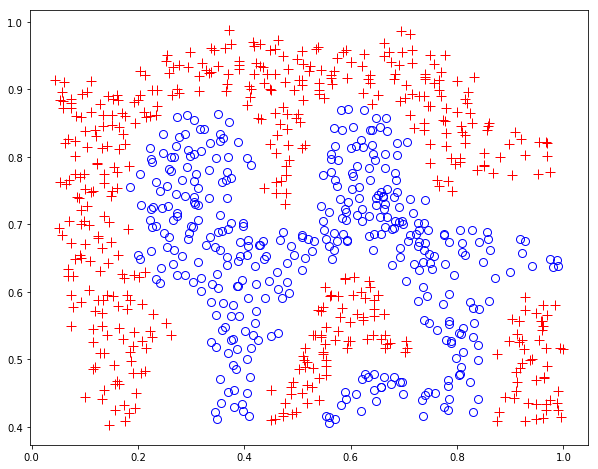

In [19]:
# plot the data to visualize it here
pos = np.where(y==1)
neg = np.where(y==0)

plt.plot(X[neg,0], X[neg,1], 'bo', markersize=8, fillstyle='none', markeredgewidth=1) 
plt.plot(X[pos,0], X[pos,1], 'r+', markersize=10, markeredgewidth=1) 

In our Lecture 10 notebook, we showed an example of creating a non-linear SVM classifier using a gaussian kernel.  This was our
last example in the lecture notebook.  In that example, by specifying the `gamma = 1.0` parameter when creating the SVM 
classifier, we were basically asking for a standard gaussian kernel.  

However, if you examine the [scikit-learn SVM classifier documentation(http://scikit-learn.org/stable/modules/svm.html) 
and read about the radial basis functions (rbf), you will find that the rbf kernel functions have the following definition:

$$
K_{\textrm{rbf}} = \textrm{exp}(- \gamma \|x - x' \|^2 )
$$

So to be precise, if you want to get exactly the gaussian kernel functions as were discussed in the video, where we have a $\sigma$
parameter which controls how fast the similarity decays between the 2 points to 0, we have the relationship between $\gamma$
and $\sigma$ of the following:

$$
\gamma = \frac{1}{2 \sigma^2}
$$

I have used the techniques discussed in the previous week 8 and found out that a value of $C = 1.0$ and a $\sigma = 0.1$ works
well for this second dataset to classify the data.  A $sigma$ of $0.1$ works out to $\gamma = \frac{1}{2 \times 0.1^2} = 50$.
In the next cell, create a SVM classifer for the second data set.  Use a `rbf` kernel function with a $\sigma = 0.1$ (e.g.
set the `gamma` parameter that scikit-learn uses to be 50).  After you have trained the classifier, visualize the decision
boundary as we did in the lecture 10 notebook by creating a mesh of points to plot a contour of the boundary.  Use a step size of 
0.01.


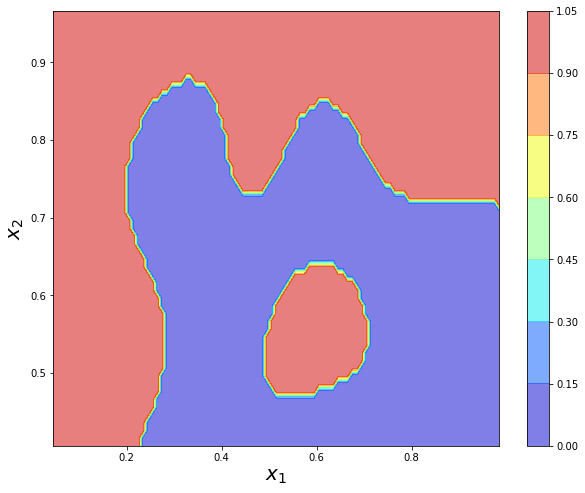

In [20]:
# create and classifier and train it
split_idx = int(0.8 * len(X)) 

x_train = X[0:split_idx]
y_train = y[0:split_idx]
x_test = X[split_idx:]
y_test = y[split_idx:]

from sklearn import svm
rbfclf = svm.SVC(kernel='rbf', gamma=50.0)
rbfclf.fit(x_train, y_train)
# create a mesh to plot in
x1_min, x1_max = x_train[:, 0].min(), x_train[:, 0].max()
x2_min, x2_max = x_train[:, 1].min(), x_train[:, 1].max()
h = 0.01  # step size in the mesh
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = rbfclf.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
# Put the result into a color plot
plt.contourf(x1, x2, Z, cmap=plt.cm.jet, alpha=0.5)
plt.colorbar()
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20);

Lets just demonstrate that the `rbf` kernel function with a `gamma` of 50 is the same as the gaussian kernel function we saw in
our lecture notebook with a $\sigma$ value of 0.1.  In the next cell I have created a wrapper function that will call your
`gaussian_kernel` function you created previously.  This is the form of the function that `scikit-learn` expects when you want
to specify your own version of the kernel function to use.  I have also shown how to create the `scikit-learn` `SVM` classifier
specifying our user defined function for the kernel function.  Try training the classifier in the next cell using our own
user defined kernel functions.

In [21]:
def gaussian_kernel_combos(Xi, Xj):
    sigma = 0.1
    m1, n = Xi.shape
    m2, n = Xj.shape
    res = np.zeros( (m1, m2) )
    #print res.shape
    for i, xi in enumerate(Xi):
        for j, xj in enumerate(Xj):
            similarity = gaussian_kernel(xi, xj, sigma)
            res[i, j] = similarity
    return res
            
# train your classifier using the provided kernel function
from sklearn import svm
linclf = svm.SVC(kernel='rbf', gamma=50)
linclf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In the next cell, plot again the decision boundary (using a h step size of 0.01) for this classifier using our user defined
kernel functions.  Notice that this implementation is much slower.  However, if you examine the decision boundary that was 
produced,  you should see that we are getting basically the same model and decision boundary using the two ways of specifying
the gaussian kernel function.

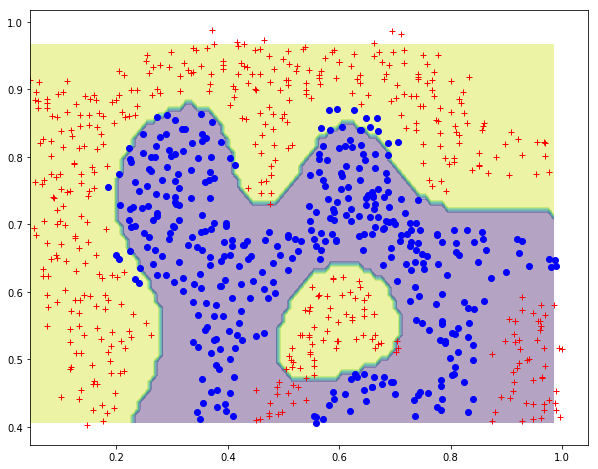

In [22]:
# create a mesh to plot in
# Put the result into a color plot
# plot the original data
x1_min, x1_max = x_train[:, 0].min(), x_train[:, 0].max()
x2_min, x2_max = x_train[:, 1].min(), x_train[:, 1].max()
h = 0.01  # step size in the mesh
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = linclf.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x2.shape)
# Put the result into a color plot
plt.contourf(x1, x2, Z, alpha=0.4)

neg_indexes = np.where(y==0)
pos_indexes = np.where(y==1)
plt.plot(X[neg_indexes, 0], X[neg_indexes, 1], 'bo')
plt.plot(X[pos_indexes, 0], X[pos_indexes, 1], 'r+')
